In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_read_xml as pdx
from bs4 import BeautifulSoup
from collections import OrderedDict
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
agent1 = 'Auction'
agent2 = 'AuctionDummy'

In [35]:
file_name = 'result.txt'

def read_file(path):
    df = pd.read_csv(path)
    df['instantBenef'] = df['bidAgent1'] - df['margCost']
    return df

print(read_file(file_name))

    taskid  bidAgent1  bidAgent2  totalBenef  margCost  totalCost  \
0        0       1459          0           0      2191       2191   
1        1       1435          0        -732      2668       4859   
2        2        190          0       -1965       274       5133   
3        3        354          0       -2049       748       5881   
4        4         51          0       -2443         0       5881   
5        5        192          0       -2392       200       6081   
6        6        567          0       -2400         0       6081   
7        7        596          0       -1833       389       6470   
8        8       2524          0       -1626      2448       8919   
9        9        838          0       -1551         0       8918   
10      10        845          0        -712       416       9335   
11      11        523          0        -284       302       9637   
12      12        723          0         -63       662      10300   
13      13        681          0  

In [38]:
def plot(path):
    df = read_file(path)
    f, ax = plt.subplots(figsize=(18, 10))
    sns.set_theme(style="darkgrid")
    width = 0.7

    # print lines 
    p1 = plt.plot(df['taskid'], df['totalBenef']/10, width*1.2, color='g', label='Profit')

    # barplots
    p1 = plt.bar(df['taskid'], df['bidAgent2'], width*1.2, color='purple', label='Bid of opponent')
    p1 = plt.bar(df['taskid'], df['bidAgent1'], width, color='grey', label='Bid at step')
    p1 = plt.bar(df['taskid'], df['margCost'], width*(1.3/1.6), color='b', label='Marginal cost at step')
    p1 = plt.bar(df['taskid'], df['instantBenef'], width/1.6, color='g', label='Profit at step')

    # add legends and 
    ax.legend(ncol=2, loc="upper left", frameon=True)

# Plot agents

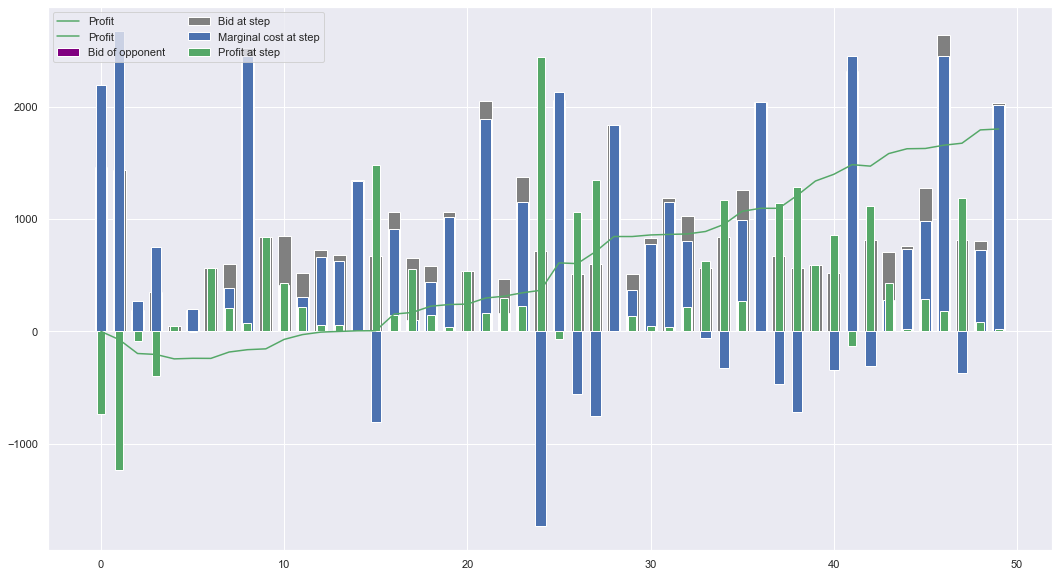

In [41]:
plot('result_cupid_154.txt')

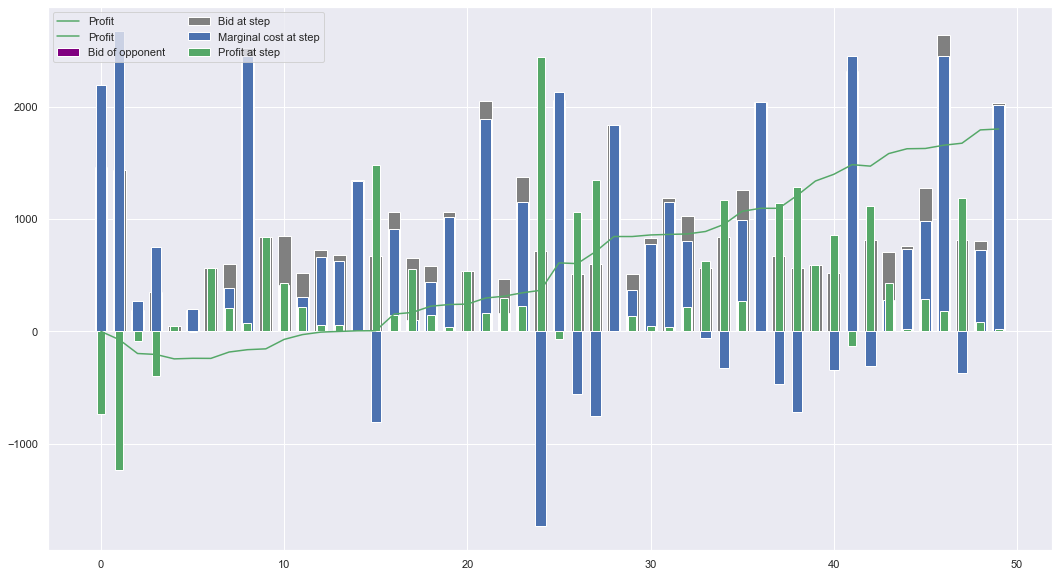

In [40]:
plot('result_1.txt')

In [ ]:

# conditions
c1bis = np.sign(df['bidAgent1']) == np.sign(df['margCost'])
c1 = (df['bidAgent1'] > df['margCost']) & c1bis
c2bis = np.sign(df['bidAgent1']) == np.sign(df['instantBenef'])
c2 = (df['bidAgent1'] > df['instantBenef']) & c2bis
c3 = (c1 & c2)
c4 = (~ c1) & c2
c5 = (~ c1) & (~ c2)


# sns.lineplot(data=df, x='taskid', y='totalBenef', color='g', label='Profit')


# sns.barplot(data=df, x='taskid', y='bidAgent2', color='pink', label='Bid of opponent')

# sns.barplot(data=df, x='taskid', y='instantBenef', width=width/3, color='g', label='Profit at step')
# p1 = plt.bar(df['taskid'][c5], df['bidAgent1'][c5], width, color='grey')

# sns.barplot(data=df, x='taskid', y='margCost', width= width/2, color='b', label='')
# p1 = plt.bar(df['taskid'][c4], df['bidAgent1'][c4], width, color='grey')

# p1 = plt.bar(df['taskid'][c3], df['bidAgent1'][c3], width, color='grey', label='Bid at step')



# sns.lineplot(data=df, x='taskid', y='totalCost', color='b', label='Total Cost')
# sns.lineplot(data=df, x='taskid', y='totalRevenu', color='r', label='Revenue')